In [81]:
#Planetary Objects Comparison Analysis
import pandas as pd
import json
import numpy as np
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import scipy.stats.stats as stats

In [120]:
import urllib.request, json 
with urllib.request.urlopen("http://geometrics.jacobs-university.de/data_final/mars_features.json") as mercury_f:
    mars_feature = json.loads(mercury_f.read().decode())
with urllib.request.urlopen("http://geometrics.jacobs-university.de/data_final/mercury_features.json") as mercury_f:
    mercury_feature = json.loads(mercury_f.read().decode())
with urllib.request.urlopen("http://geometrics.jacobs-university.de/data_final/moon_features.json") as mercury_f:
    moon_feature = json.loads(mercury_f.read().decode())
with urllib.request.urlopen("http://geometrics.jacobs-university.de/data_final/venus_features.json") as mercury_f:
    venus_feature = json.loads(mercury_f.read().decode())

In [99]:
#Geotype Counter
def count_geotype(json_data):
    polygon = 0
    linestring = 0
    point = 0
    for i in json_data:
        check = i['geometry']['type']
        if check == 'MultiPolygon' or check == 'Polygon':
            polygon += 1
        elif check == 'LineString' or check == 'MultiLineString':
            linestring += 1
        elif check == 'Point':
            point +=1
    print('Polygon: ', polygon, 'linestring: ', linestring, 'point: ', point)

In [100]:
#Mars
count_geotype(mars_feature['features'])

Polygon:  1517 linestring:  186 point:  146


In [101]:
#Mercury
count_geotype(mercury_feature['features'])

Polygon:  416 linestring:  36 point:  33


In [102]:
#the Moon
count_geotype(moon_feature['features'])

Polygon:  7387 linestring:  106 point:  43


In [103]:
#Venus
count_geotype(venus_feature['features'])

Polygon:  420 linestring:  15 point:  1531


In [119]:
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/mars_paper.json') as mars_paper:
    mars_paper = json.load(mars_paper)
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/mercury_paper.json') as mercury_paper:
    mercury_paper = json.load(mercury_paper)
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/moon_paper.json') as moon_paper:
    moon_paper = json.load(moon_paper)
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/venus_paper.json') as venus_paper:
    venus_paper = json.load(venus_paper)

In [105]:
# Number of publications Mars
len(mars_paper['features'])

26630

In [106]:
# Number of publications Mars
len(mercury_paper['features'])

1707

In [107]:
# Number of publications Mars
len(moon_paper['features'])

58498

In [108]:
# Number of publications Mars
len(venus_paper['features'])

2660

In [109]:
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/mars_stats.json') as mars_stats:
    mars_stats = json.load(mars_stats)
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/mercury_stats.json') as mercury_stats:
    mercury_stats = json.load(mercury_stats)
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/moon_stats.json') as moon_stats:
    moon_stats = json.load(moon_stats)
with urllib.request.urlopen('http://geometrics.jacobs-university.de/data_final/venus_stats.json') as venus_stats:
    venus_stats = json.load(venus_stats)

In [110]:
def json_toPandas(json_data):
    keylist = list(json_data['features'][0]['properties'].keys())
    output = pd.DataFrame()
    obj = {}
    for i in keylist:
        obj[str(i)] = []
        for j in json_data['features']:
            try:
                obj[str(i)].append(j['properties'][str(i)])
            except:
                obj[str(i)].append(0)
        output[str(i)] = obj[str(i)]
    return output

In [121]:
mars_feature = json_toPandas(mars_feature)
mercury_feature = json_toPandas(mercury_feature)
moon_feature = json_toPandas(moon_feature)
venus_feature = json_toPandas(venus_feature)

In [112]:
mars_stats = json_toPandas(mars_stats)
mercury_stats = json_toPandas(mercury_stats)
moon_stats = json_toPandas(moon_stats)
venus_stats = json_toPandas(venus_stats)

In [122]:
mars_feature = mars_feature.drop(['name'], axis = 1)

In [125]:
mars_feature.columns = ['diameter', 'feature_type', 'name']

In [129]:
mercury_feature.columns = ['Feature_ID', 'Target', 'name', 'Diameter',
       'Center_Latitude', 'Center_Longitude', 'Northern_Latitude',
       'Southern_Latitude', 'Eastern_Longitude', 'Western_Longitude',
       'Continent', 'Ethnicity', 'Feature_Type', 'Feature_Type_Code', 'Quad',
       'Approval_Status', 'Approval_Date', 'Origin']

In [131]:
moon_feature.columns = ['Feature_ID', 'Target', 'name', 'Diameter',
       'Center_Latitude', 'Center_Longitude', 'Northern_Latitude',
       'Southern_Latitude', 'Eastern_Longitude', 'Western_Longitude',
       'Continent', 'Ethnicity', 'Feature_Type', 'Feature_Type_Code', 'Quad',
       'Approval_Status', 'Approval_Date', 'Origin']

In [133]:
mars = mars_feature.join(mars_stats.set_index('name'), on='name')
mercury = mercury_feature.join(mercury_stats.set_index('name'), on='name')
moon = moon_feature.join(moon_stats.set_index('name'), on='name')
venus = venus_feature.join(venus_stats.set_index('name'), on='name')

In [136]:
mars_paper = json_toPandas(mars_paper)

In [137]:
mercury_paper = json_toPandas(mercury_paper)
moon_paper = json_toPandas(moon_paper)
venus_paper = json_toPandas(venus_paper)

In [138]:
mars_paper['year'] = mars_paper['year'].astype(int)
mercury_paper['year'] = mercury_paper['year'].astype(int)
moon_paper['year'] = moon_paper['year'].astype(int)
venus_paper['year'] = venus_paper['year'].astype(int)

In [139]:
latest_mars = mars_paper.loc[mars_paper['year'] >= 2009]
latest_mercury = mercury_paper.loc[mercury_paper['year'] >= 2009]
latest_moon = moon_paper.loc[moon_paper['year'] >= 2009]
latest_venus = venus_paper.loc[venus_paper['year'] >= 2009]

In [140]:
mars_index = mars_paper.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)
mercury_index = mercury_paper.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)
moon_index = moon_paper.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)
venus_index = venus_paper.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)

In [141]:
late_mars = latest_mars.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)
late_mercury = latest_mercury.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)
late_moon = latest_moon.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)
late_venus = latest_venus.groupby(['title', 'year']).mean().sort_values(by='citation_count', ascending=False)

In [142]:
mars_index.to_csv("mars_index.csv")
mercury_index.to_csv("mercury_index.csv")
moon_index.to_csv("moon_index.csv")
venus_index.to_csv("venus_index.csv")

In [143]:
late_mars.to_csv("index10_mars.csv")
late_mercury.to_csv("index10_mercury.csv")
late_moon.to_csv("index10_moon.csv")
late_venus.to_csv("index10_venus.csv")

In [144]:
late_mars

,,citation_count
title,year,
['Identification of hydrated silicate minerals on Mars using MRO-CRISM: Geologic context near Nili Fossae and implications for aqueous alteration'],2009,219.0
['Mars Science Laboratory Mission and Science Investigation'],2012,188.0
['The ChemCam Instrument Suite on the Mars Science Laboratory (MSL) Rover: Body Unit and Combined System Tests'],2012,154.0
['The Sample Analysis at Mars Investigation and Instrument Suite'],2012,154.0
['The ChemCam Instrument Suite on the Mars Science Laboratory (MSL) Rover: Science Objectives and Mast Unit Description'],2012,139.0
['The Mars Atmosphere and Volatile Evolution ( MAVEN) Mission'],2015,124.0
['Hydrous minerals on Mars as seen by the CRISM and OMEGA imaging spectrometers: Updated global view'],2013,120.0
['Updated global map of Martian valley networks and implications for climate and hydrologic processes'],2010,119.0
['Reanalysis of the Viking results suggests perchlorate and organics at midlatitudes on Mars'],2010,117.0


In [145]:
def dist_plot(f):
    obj = mars_paper.loc[mars_paper['name'] == f].groupby(['name','title','citation_count']).agg({'title':'count', 'citation_count':'sum'})
    obj = pd.DataFrame(list(obj.title), list(obj.citation_count))
    obj.columns = ['NP']
    plt.figure()
    plt.rcParams["figure.figsize"] = (14,10)
    plt.fontsize = 10
    plt.xlabel('Citation Count', fontsize=25)
    plt.ylabel('Number of Papers', fontsize=25)
    plt.xlim(100)
    data = obj.groupby(obj.index)['NP'].sum()
    data.loc[100] = data[data.index>100].sum()
    data = data.drop(data[data.index > 100].index)
    skewness = data.skew()
    plt.figtext(0.63, 0.84, 'Skewness:', ha="right", fontsize=25)
    plt.figtext(0.85, 0.78, skewness, ha="right", fontsize=30, bbox={"alpha":0.5,"pad":15})
    ax = data.plot.bar(fontsize=17)
    ax.grid(which='major', alpha=0.5)
    ax.set_title(str(f),fontsize= 35)

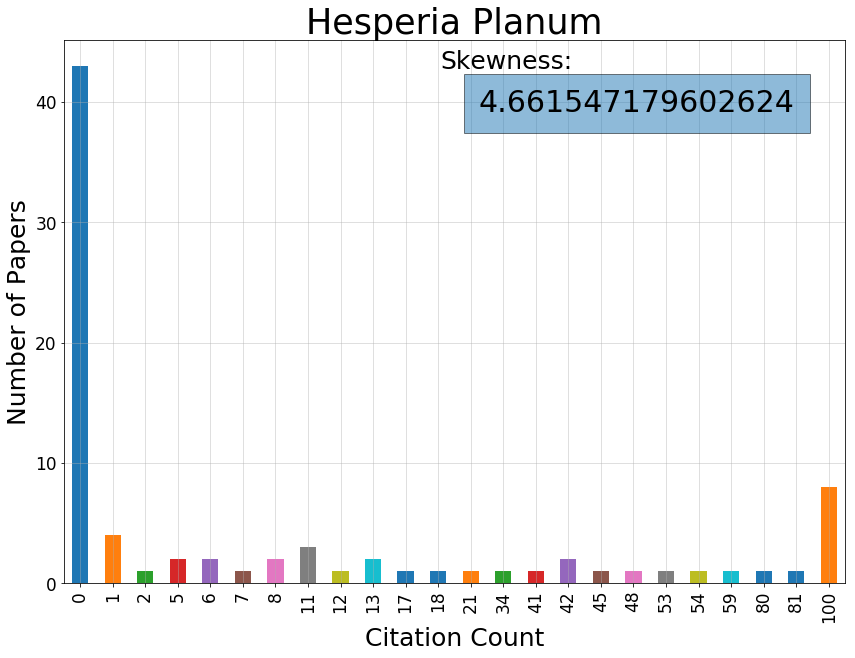

In [147]:
dist_plot('Hesperia Planum')

In [149]:
np_list = ['number_of_papers_1970','number_of_papers_1971_1980','number_of_papers_1981_1990','number_of_papers_1991_2000',
           'number_of_papers_2001_2010', 'number_of_papers_2011_2015','number_of_papers_2016_2017']
NP_mars= []
[NP_mars.append(sum(mars[i])) for i in np_list]
NP_mars

[149, 2486, 4144, 6024, 9760, 4842, 2384]

In [150]:
ncp_list = ['number_of_citing_papers_1970', 'number_of_citing_papers_1971_1980',
            'number_of_citing papers_1981_1990', 'number_of_citing_papers_1991_2000',
            'number_of_citing_papers_2001_2010', 'number_of_citing_papers_2011_2015', 
            'number_of_citing_papers_2016_2017']
NCP_mars = []
[NCP_mars.append(sum(mars[i])) for i in ncp_list]
NCP_mars

[160, 49084, 63848, 64504, 97991, 23267, 4310]

In [151]:
tnc_list = ['total_number_of_citations_1970', 'total_number_of_citations_1971_1980',
            'total_number_of_citations_1981_1990', 'total_number_of_citations_1991_2000',
            'total_number_of_citations_2001_2010', 'total_number_of_citations_2011_2015', 
            'total_number_of_citations_2016_2017']
TNC_mars= []
[TNC_mars.append(sum(mars[i])) for i in tnc_list]
TNC_mars

[164, 62626, 79038, 81048, 144095, 31359, 5455]

In [152]:
tnrc_list = ['total+number_of_refereed_citations_1970', 'total_number_of_refereed_citations_1971_1980',
            'total_number_of_refereed_citations_1981_1990', 'total_number_of_refereed_citations_1991_2000',
            'total_number_of_refereed_citations_2001_2010', 'total_number_of_refereed_citations_2011_2015', 
            'total_number_of_refereed_citations_2016_2017']
TNRC_mars= []
[TNRC_mars.append(sum(mars[i])) for i in tnrc_list]
TNRC_mars

[139, 55938, 67409, 68624, 127714, 28106, 5220]

In [153]:
total_mars = pd.DataFrame([NP_mars, NCP_mars, TNC_mars, TNRC_mars])
total_mars.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2015', '2016-2018']
total_mars['2011-2018']= total_mars['2011-2015'] + total_mars['2016-2018']
total_mars = total_mars.drop(columns=['2011-2015', '2016-2018'])
total_mars.index = ['NP', 'NCP', 'TNC', 'TNRC']

In [169]:
total_mars

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,149,2486,4144,6024,9760,7226
NCP,160,49084,63848,64504,97991,27577
TNC,164,62626,79038,81048,144095,36814
TNRC,139,55938,67409,68624,127714,33326


In [179]:
moon['number_of_papers_1970'].sum()

381.0

In [180]:
np_list = ['number_of_papers_1970','number_of_papers_1971_1980','number_of_papers_1981_1990','number_of_papers_1991_2000',
           'number_of_papers_2001_2010', 'number_of_papers_2011_2015','number_of_papers_2016_2017']
NP_moon= []
[NP_moon.append(moon[i].sum()) for i in np_list]
NP_moon

ncp_list = ['number_of_citing_papers_1970', 'number_of_citing_papers_1971_1980',
            'number_of_citing_papers_1981_1990', 'number_of_citing_papers_1991_2000',
            'number_of_citing_papers_2001_2010', 'number_of_citing_papers_2011_2015', 
            'number_of_citing_papers_2016_2017']
NCP_moon = []
[NCP_moon.append(moon[i].sum()) for i in ncp_list]
NCP_moon

tnc_list = ['total_number_of_citations_1970', 'total_number_of_citations_1971_1980',
            'total_number_of_citations_1981_1990', 'total_number_of_citations_1991_2000',
            'total_number_of_citations_2001_2010', 'total_number_of_citations_2011_2015', 
            'total_number_of_citations_2016_2017']
TNC_moon= []
[TNC_moon.append(moon[i].sum()) for i in tnc_list]
TNC_moon

tnrc_list = ['total_number_of_refereed_citations_1970', 'total_number_of_refereed_citations_1971_1980',
            'total_number_of_refereed_citations_1981_1990', 'total_number_of_refereed_citations_1991_2000',
            'total_number_of_refereed_citations_2001_2010', 'total_number_of_refereed_citations_2011_2015', 
            'total_number_of_refereed_citations_2016_2017']
TNRC_moon= []
[TNRC_moon.append(moon[i].sum()) for i in tnrc_list]
TNRC_moon

total_moon = pd.DataFrame([NP_moon, NCP_moon, TNC_moon, TNRC_moon])
total_moon.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2015', '2016-2018']
total_moon['2011-2018']= total_moon['2011-2015'] + total_moon['2016-2018']
total_moon = total_moon.drop(columns=['2011-2015', '2016-2018'])
total_moon.index = ['NP', 'NCP', 'TNC', 'TNRC']

total_moon

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,381.0,13293.0,17132.0,11470.0,5700.0,7290.0
NCP,1960.0,214301.0,338187.0,176043.0,56237.0,24567.0
TNC,1983.0,255111.0,415240.0,201519.0,61769.0,27646.0
TNRC,1885.0,226970.0,382332.0,174234.0,51937.0,24139.0


In [181]:
np_list = ['number_of_papers_1970','number_of_papers_1971_1980','number_of_papers_1981_1990','number_of_papers_1991_2000',
           'number_of_papers_2001_2010', 'number_of_papers_2011_2015','number_of_papers_2016_2017']
NP_mercury= []
[NP_mercury.append(mercury[i].sum()) for i in np_list]
NP_mercury

ncp_list = ['number_of_citing_papers_1970', 'number_of_citing_papers_1971_1980',
            'number_of_citing_papers_1981_1990', 'number_of_citing_papers_1991_2000',
            'number_of_citing_papers_2001_2010', 'number_of_citing_papers_2011_2015', 
            'number_of_citing_papers_2016_2017']
NCP_mercury = []
[NCP_mercury.append(mercury[i].sum()) for i in ncp_list]
NCP_mercury

tnc_list = ['total_number_of_citations_1970', 'total_number_of_citations_1971_1980',
            'total_number_of_citations_1981_1990', 'total_number_of_citations_1991_2000',
            'total_number_of_citations_2001_2010', 'total_number_of_citations_2011_2015', 
            'total_number_of_citations_2016_2017']
TNC_mercury= []
[TNC_mercury.append(mercury[i].sum()) for i in tnc_list]
TNC_mercury

tnrc_list = ['total_number_of_refereed_citations_1970', 'total_number_of_refereed_citations_1971_1980',
            'total_number_of_refereed_citations_1981_1990', 'total_number_of_refereed_citations_1991_2000',
            'total_number_of_refereed_citations_2001_2010', 'total_number_of_refereed_citations_2011_2015', 
            'total_number_of_refereed_citations_2016_2017']
TNRC_mercury= []
[TNRC_mercury.append(mercury[i].sum()) for i in tnrc_list]
TNRC_mercury

total_mercury = pd.DataFrame([NP_mercury, NCP_mercury, TNC_mercury, TNRC_mercury])
total_mercury.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2015', '2016-2018']
total_mercury['2011-2018']= total_mercury['2011-2015'] + total_mercury['2016-2018']
total_mercury = total_mercury.drop(columns=['2011-2015', '2016-2018'])
total_mercury.index = ['NP', 'NCP', 'TNC', 'TNRC']

total_mercury

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,0.0,115.0,209.0,246.0,544.0,566.0
NCP,0.0,1635.0,3756.0,6485.0,11633.0,2581.0
TNC,0.0,1812.0,3888.0,7095.0,13619.0,2871.0
TNRC,0.0,1707.0,3719.0,6563.0,11978.0,2576.0


In [182]:
np_list = ['number_of_papers_1970','number_of_papers_1971_1980','number_of_papers_1981_1990','number_of_papers_1991_2000',
           'number_of_papers_2001_2010', 'number_of_papers_2011_2015','number_of_papers_2016_2017']
NP_venus= []
[NP_venus.append(sum(venus[i])) for i in np_list]
NP_venus

ncp_list = ['number_of_citing_papers_1970', 'number_of_citing_papers_1971_1980',
            'number_of_citing_papers_1981_1990', 'number_of_citing_papers_1991_2000',
            'number_of_citing_papers_2001_2010', 'number_of_citing_papers_2011_2015', 
            'number_of_citing_papers_2016_2017']
NCP_venus = []
[NCP_venus.append(sum(venus[i])) for i in ncp_list]
NCP_venus

tnc_list = ['total_number_of_citations_1970', 'total_number_of_citations_1971_1980',
            'total_number_of_citations_1981_1990', 'total_number_of_citations_1991_2000',
            'total_number_of_citations_2001_2010', 'total_number_of_citations_2011_2015', 
            'total_number_of_citations_2016_2017']
TNC_venus= []
[TNC_venus.append(sum(venus[i])) for i in tnc_list]
TNC_venus

tnrc_list = ['total_number_of_refereed_citations_1970', 'total_number_of_refereed_citations_1971_1980',
            'total_number_of_refereed_citations_1981_1990', 'total_number_of_refereed_citations_1991_2000',
            'total_number_of_refereed_citations_2001_2010', 'total_number_of_refereed_citations_2011_2015', 
            'total_number_of_refereed_citations_2016_2017']
TNRC_venus= []
[TNRC_venus.append(sum(venus[i])) for i in tnrc_list]
TNRC_venus

total_venus = pd.DataFrame([NP_venus, NCP_venus, TNC_venus, TNRC_venus])
total_venus.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2015', '2016-2018']
total_venus['2011-2018']= total_venus['2011-2015'] + total_venus['2016-2018']
total_venus = total_venus.drop(columns=['2011-2015', '2016-2018'])
total_venus.index = ['NP', 'NCP', 'TNC', 'TNRC']

total_venus

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,6,115,685,1261,399,187
NCP,33,1838,6494,17577,3667,713
TNC,33,2110,9048,26185,3879,793
TNRC,26,1967,8219,21483,3496,725


In [183]:
mars_list = list(total_mars.loc['NP'])
mercury_list = list(total_mercury.loc['NP'])
moon_list = list(total_moon.loc['NP'])
venus_list = list(total_venus.loc['NP'])
comparison_np = pd.DataFrame([mars_list, mercury_list, moon_list, venus_list])
comparison_np.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']
comparison_np.index = ['Mars', 'Mercury', 'The Moon', 'Venus']

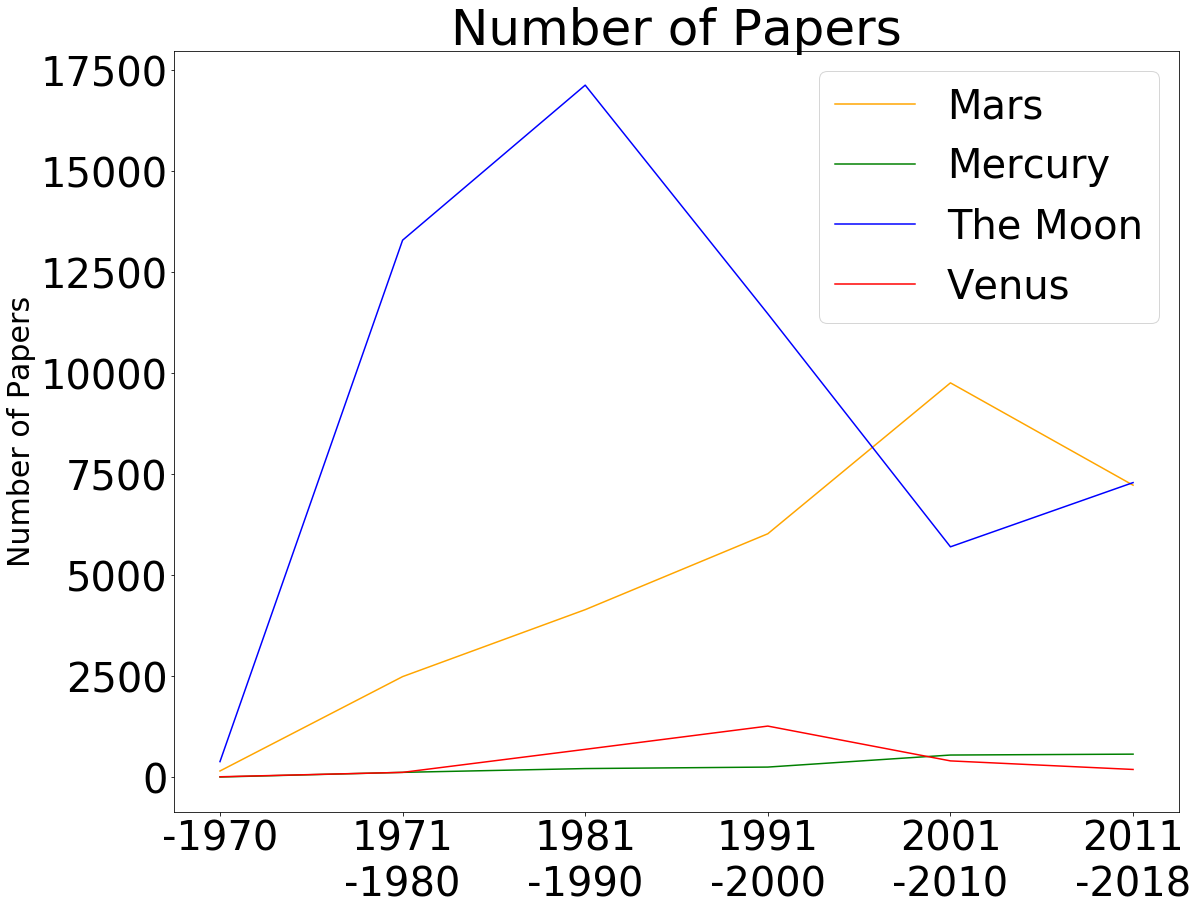

In [184]:
import pylab 
plt.rcParams["figure.figsize"] = (18,14)
params = {'legend.fontsize': 40,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
plt.yticks(fontsize=40)
plt.title('Number of Papers', fontsize = 50)
plt.ylabel('Number of Papers', fontsize=30)
year = comparison_np.columns
mars_np = comparison_np.loc['Mars']
mercury_np = comparison_np.loc['Mercury']
venus_np = comparison_np.loc['Venus']
moon_np = comparison_np.loc['The Moon']
plt.plot(year, mars_np, color='orange', label='Mars')
plt.plot(year, mercury_np, color='g', label='Mercury')
plt.plot(year, moon_np, color='blue', label='The Moon')
plt.plot(year, venus_np, color='red', label ='Venus')
leg = plt.legend();
plt.show()

In [185]:
mars_list_ncp= list(total_mars.loc['NCP'])
mercury_list_ncp = list(total_mercury.loc['NCP'])
moon_list_ncp = list(total_moon.loc['NCP'])
venus_list_ncp = list(total_venus.loc['NCP'])
comparison_ncp = pd.DataFrame([mars_list_ncp, mercury_list_ncp, moon_list_ncp, venus_list_ncp])
comparison_ncp.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2016-2018']
comparison_ncp.index = ['Mars', 'Mercury', 'The Moon', 'Venus']

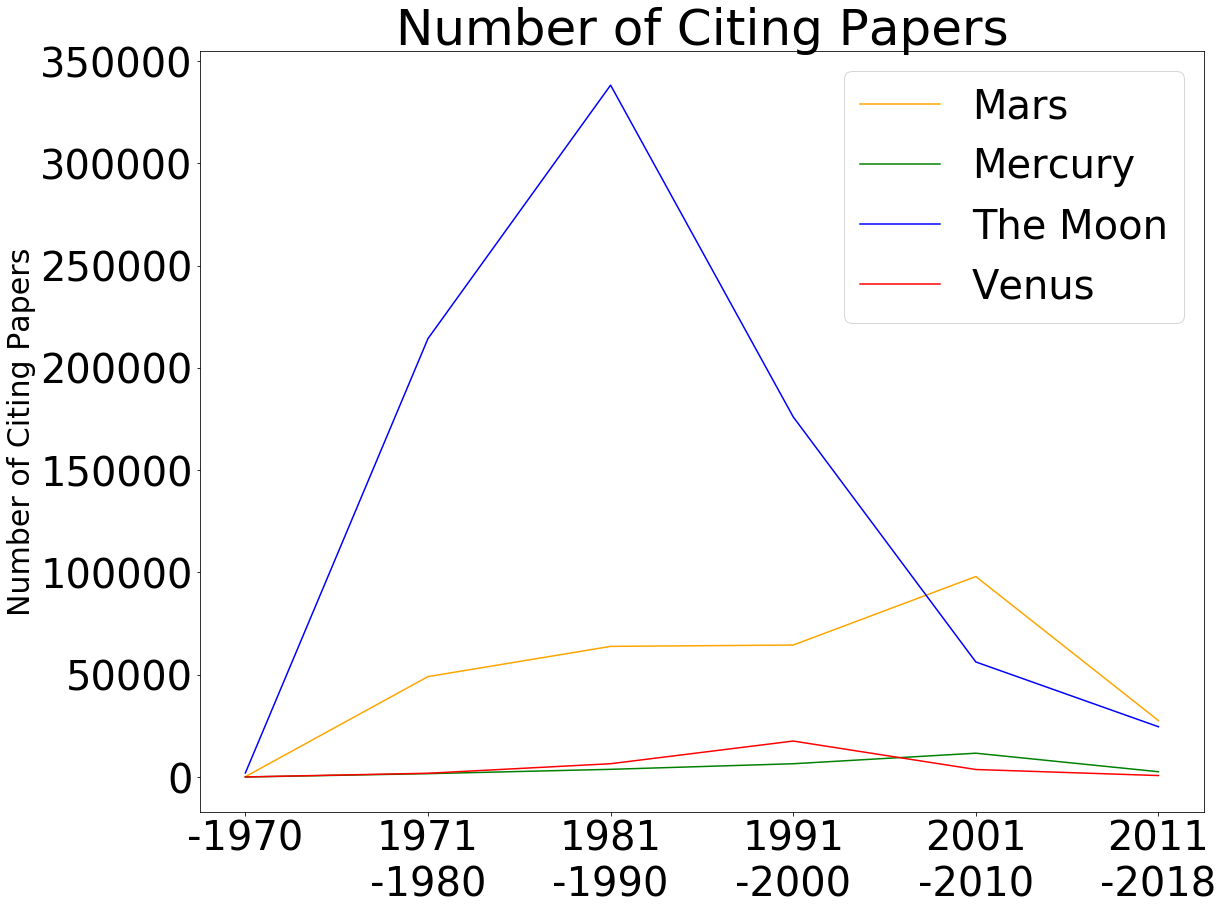

In [186]:
year = comparison_ncp.columns
mars_ncp = comparison_ncp.loc['Mars']
mercury_ncp = comparison_ncp.loc['Mercury']
venus_ncp = comparison_ncp.loc['Venus']
moon_ncp = comparison_ncp.loc['The Moon']
plt.rcParams.update(params)
plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Number of Citing Papers', fontsize=30)
plt.title('Number of Citing Papers', fontsize = 50)
plt.plot(year, mars_ncp, color='orange', label='Mars')
plt.plot(year, mercury_ncp, color='g', label='Mercury')
plt.plot(year, moon_ncp, color='blue', label='The Moon')
plt.plot(year, venus_ncp, color='red', label ='Venus')
leg = plt.legend();
plt.show()

In [187]:
mars_list_TNRC= list(total_mars.loc['TNRC'])
mercury_list_TNRC = list(total_mercury.loc['TNRC'])
moon_list_TNRC = list(total_moon.loc['TNRC'])
venus_list_TNRC = list(total_venus.loc['TNRC'])
comparison_TNRC = pd.DataFrame([mars_list_TNRC, mercury_list_TNRC, moon_list_TNRC, venus_list_TNRC])
comparison_TNRC.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2016-2018']
comparison_TNRC.index = ['Mars', 'Mercury', 'The Moon', 'Venus']

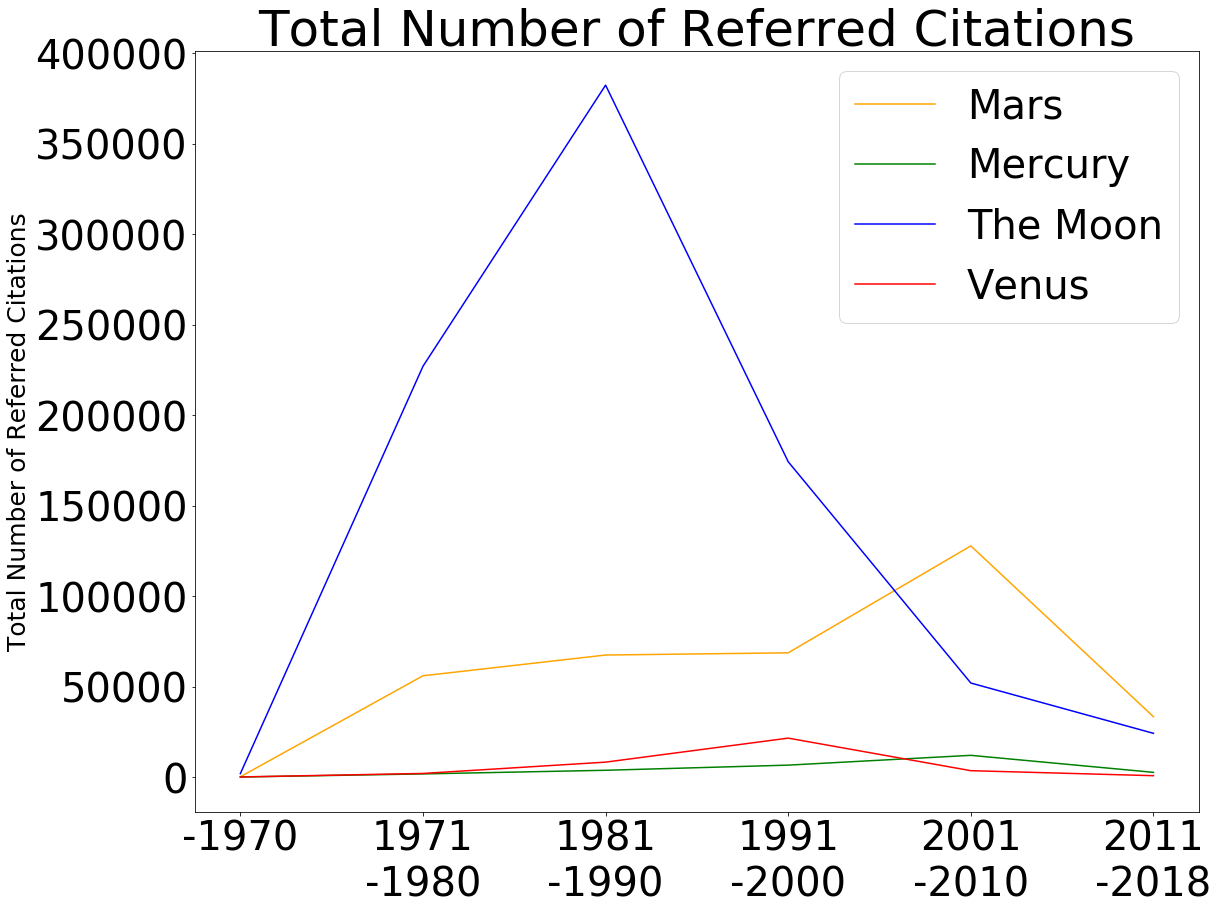

In [188]:
year = comparison_TNRC.columns
mars_TNRC = comparison_TNRC.loc['Mars']
mercury_TNRC = comparison_TNRC.loc['Mercury']
venus_TNRC = comparison_TNRC.loc['Venus']
moon_TNRC = comparison_TNRC.loc['The Moon']
plt.ylabel('Total Number of Referred Citations', fontsize=25)

plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
plt.yticks(fontsize=40)
plt.title('Total Number of Referred Citations', fontsize = 50)
plt.plot(year, mars_TNRC, color='orange', label='Mars')
plt.plot(year, mercury_TNRC, color='g', label='Mercury')
plt.plot(year, moon_TNRC, color='blue', label='The Moon')
plt.plot(year, venus_TNRC, color='red', label ='Venus')
leg = plt.legend();
plt.show()

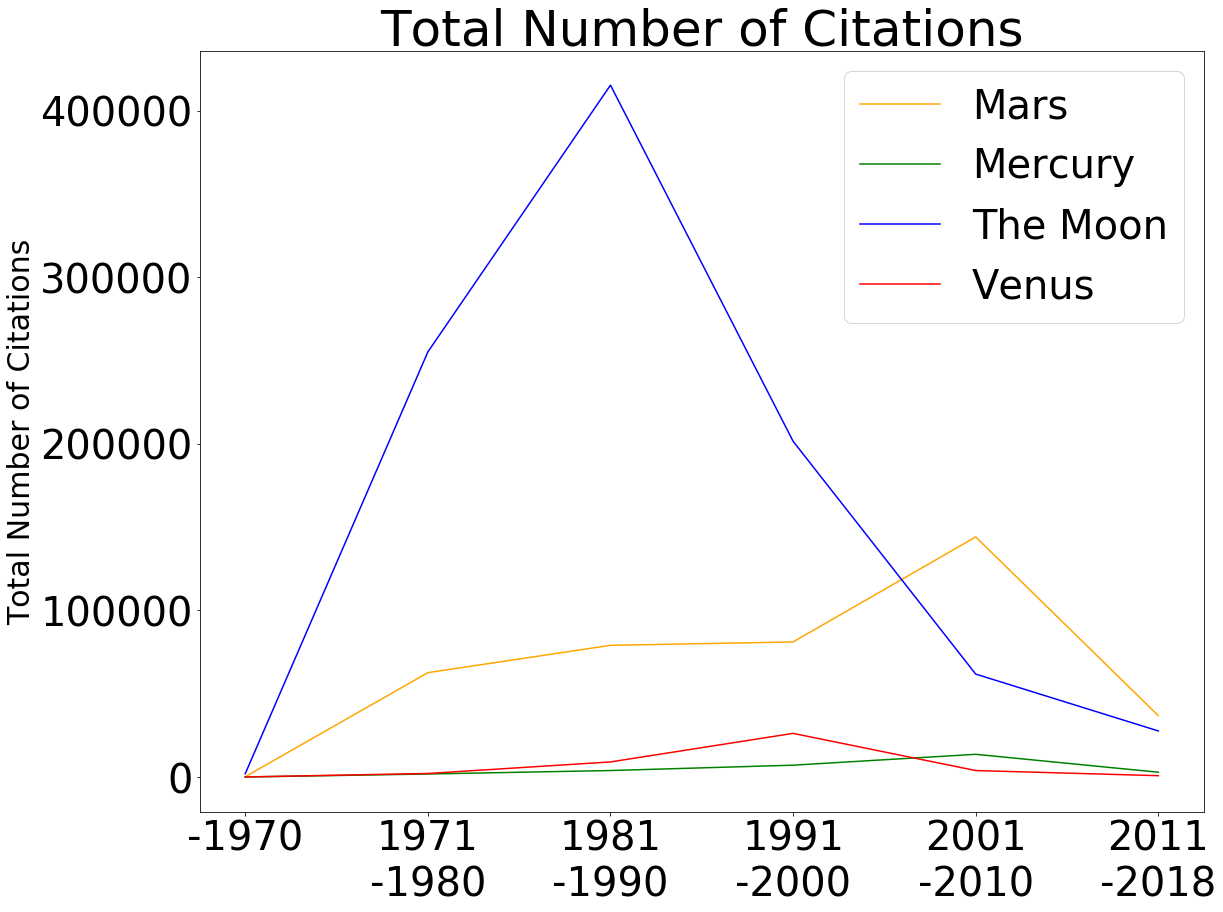

In [189]:
mars_list_TNC= list(total_mars.loc['TNC'])
mercury_list_TNC = list(total_mercury.loc['TNC'])
moon_list_TNC = list(total_moon.loc['TNC'])
venus_list_TNC = list(total_venus.loc['TNC'])
comparison_TNC = pd.DataFrame([mars_list_TNC, mercury_list_TNC, moon_list_TNC, venus_list_TNC])
comparison_TNC.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2016-2018']
comparison_TNC.index = ['Mars', 'Mercury', 'The Moon', 'Venus']

year = comparison_TNC.columns
mars_TNC = comparison_TNC.loc['Mars']
mercury_TNC = comparison_TNC.loc['Mercury']
venus_TNC = comparison_TNC.loc['Venus']
moon_TNC = comparison_TNC.loc['The Moon']
plt.rcParams.update(params)
plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Total Number of Citations', fontsize=30)
plt.title('Total Number of Citations', fontsize = 50)

plt.plot(year, mars_TNC, color='orange', label='Mars')
plt.plot(year, mercury_TNC, color='g', label='Mercury')
plt.plot(year, moon_TNC, color='blue', label='The Moon')
plt.plot(year, venus_TNC, color='red', label ='Venus')
leg = plt.legend();
plt.show()

In [190]:
comparison_np

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
Mars,149.0,2486.0,4144.0,6024.0,9760.0,7226.0
Mercury,0.0,115.0,209.0,246.0,544.0,566.0
The Moon,381.0,13293.0,17132.0,11470.0,5700.0,7290.0
Venus,6.0,115.0,685.0,1261.0,399.0,187.0


In [191]:
comparison_ncp

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2016-2018
Mars,160.0,49084.0,63848.0,64504.0,97991.0,27577.0
Mercury,0.0,1635.0,3756.0,6485.0,11633.0,2581.0
The Moon,1960.0,214301.0,338187.0,176043.0,56237.0,24567.0
Venus,33.0,1838.0,6494.0,17577.0,3667.0,713.0


In [192]:
comparison_TNRC

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2016-2018
Mars,139.0,55938.0,67409.0,68624.0,127714.0,33326.0
Mercury,0.0,1707.0,3719.0,6563.0,11978.0,2576.0
The Moon,1885.0,226970.0,382332.0,174234.0,51937.0,24139.0
Venus,26.0,1967.0,8219.0,21483.0,3496.0,725.0


In [193]:
bins = np.array([1858, 1970, 1980, 1990, 2000, 2010, 2018])

In [194]:
marsg1 = mars_paper.groupby(['title','year']).mean()
marsg2 = marsg1.groupby(['year','title']).count()
marsg3 = marsg1.groupby(['year','title']).mean()
mars_np = marsg2.groupby('year').sum()
mars_cc = marsg3.groupby('year').sum()
mars_np.index = mars_np.index.astype(int)
mars_np.columns = ['NP']
mars_np['CC'] = list(mars_cc['citation_count'].astype(int))

In [195]:
marsg1 = mars_paper.groupby(['title','year']).mean()
marsg2 = marsg1.groupby(['year','title']).count()
marsg3 = marsg1.groupby(['year','title']).mean()
mars_np = marsg2.groupby('year').sum()
mars_cc = marsg3.groupby('year').sum()
mars_np.index = mars_np.index.astype(int)
mars_np.columns = ['NP']
mars_np['CC'] = list(mars_cc['citation_count'].astype(int))
mars_tplot = mars_np.groupby(pd.cut(mars_np.index, bins)).sum()
mars_tplot.index = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']

In [196]:
mars_tplot.T

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,124,1248,1989,2448,2906,2386
CC,156,23156,30161,24854,39373,12058


In [197]:
def plotting_np(planetary):
    plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
    plt.yticks(fontsize=40)
    plt.ylabel('Number of Papers', fontsize=30)
    plt.bar(planetary.index, planetary.NP)
    plt.show()

In [198]:
def plotting_cc(planetary):
    plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
    plt.yticks(fontsize=40)
    plt.ylabel('Number of Papers', fontsize=30)
    plt.bar(planetary.index, planetary.CC, color = 'orange')
    plt.show()

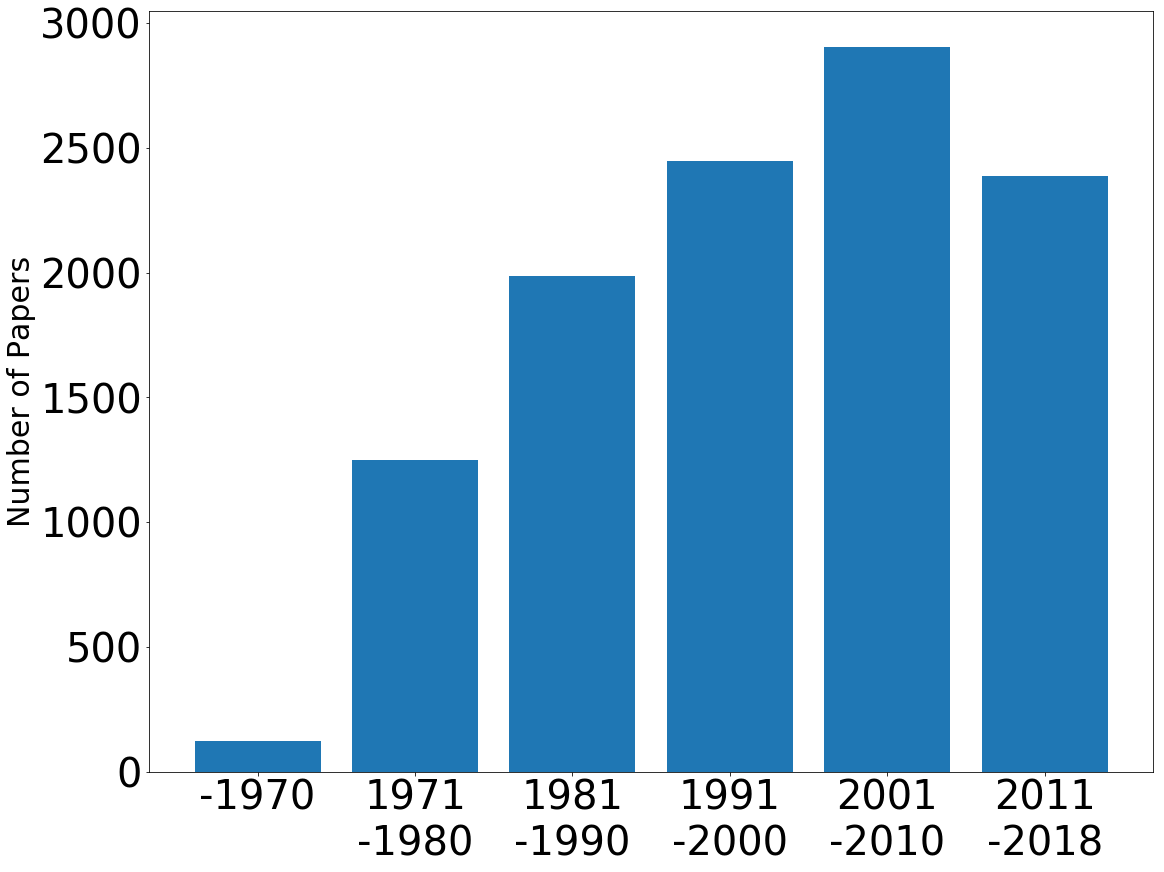

In [199]:
plotting_np(mars_tplot)

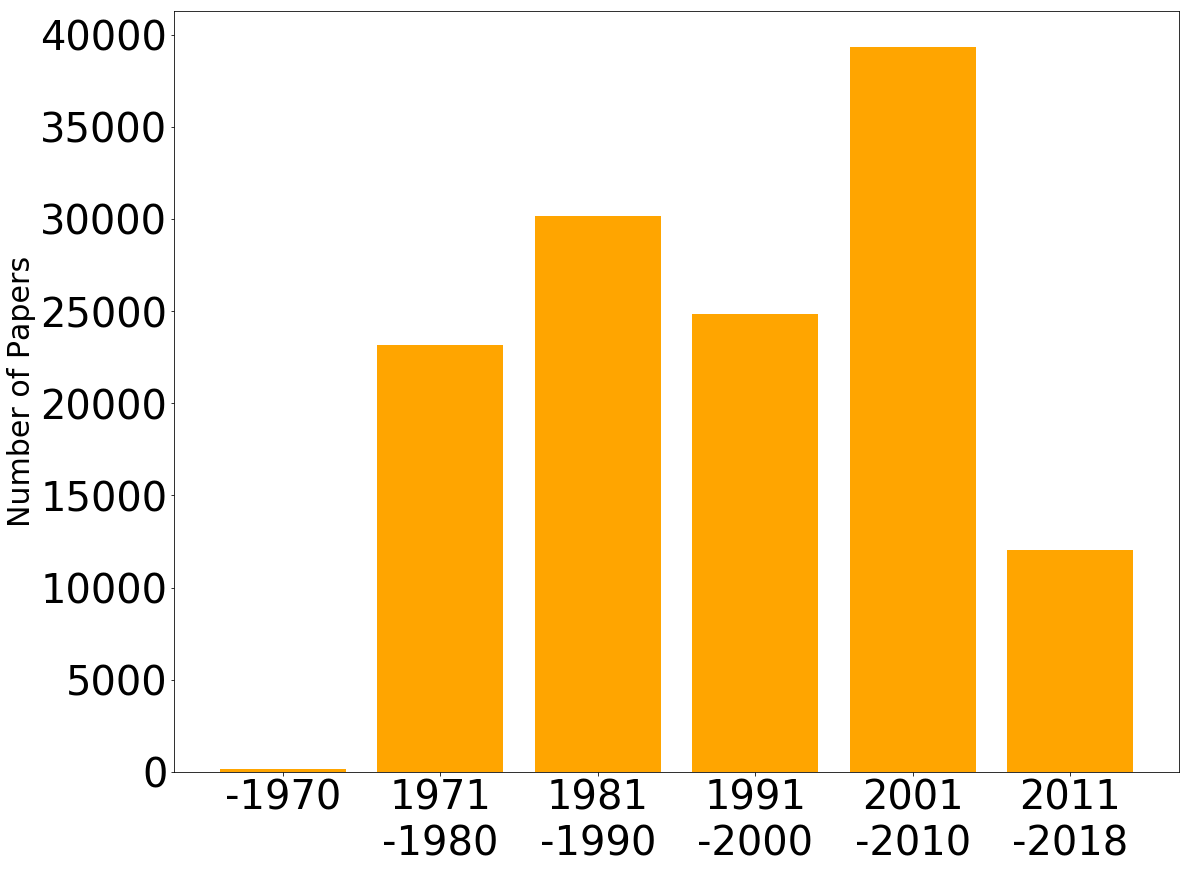

In [200]:
plotting_cc(mars_tplot)

In [204]:
mercuryg1 = mercury_paper.groupby(['title','year']).mean()
mercuryg2 = mercuryg1.groupby(['year','title']).count()
mercuryg3 = mercuryg1.groupby(['year','title']).mean()
mercury_np = mercuryg2.groupby('year').sum()
mercury_cc = mercuryg3.groupby('year').sum()
mercury_np.index = mercury_np.index.astype(int)
mercury_np.columns = ['NP']
mercury_np['CC'] = list(mercury_cc['citation_count'].astype(int))

In [205]:
mercuryg1 = mercury_paper.groupby(['title','year']).mean()
mercuryg2 = mercuryg1.groupby(['year','title']).count()
mercuryg3 = mercuryg1.groupby(['year','title']).mean()
mercury_np = mercuryg2.groupby('year').sum()
mercury_cc = mercuryg3.groupby('year').sum()
mercury_np.index = mercury_np.index.astype(int)
mercury_np.columns = ['NP']
mercury_np['CC'] = list(mercury_cc['citation_count'].astype(int))
mercury_tplot = mercury_np.groupby(pd.cut(mercury_np.index, bins)).sum()
mercury_tplot.index = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']
mercury_tplot

,NP,CC
-1970,0,0
1971-1980,109,1811
1981-1990,199,3339
1991-2000,227,6366
2001-2010,462,12091
2011-2018,468,2465


In [206]:
mercury_tplot.T

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,0,109,199,227,462,468
CC,0,1811,3339,6366,12091,2465


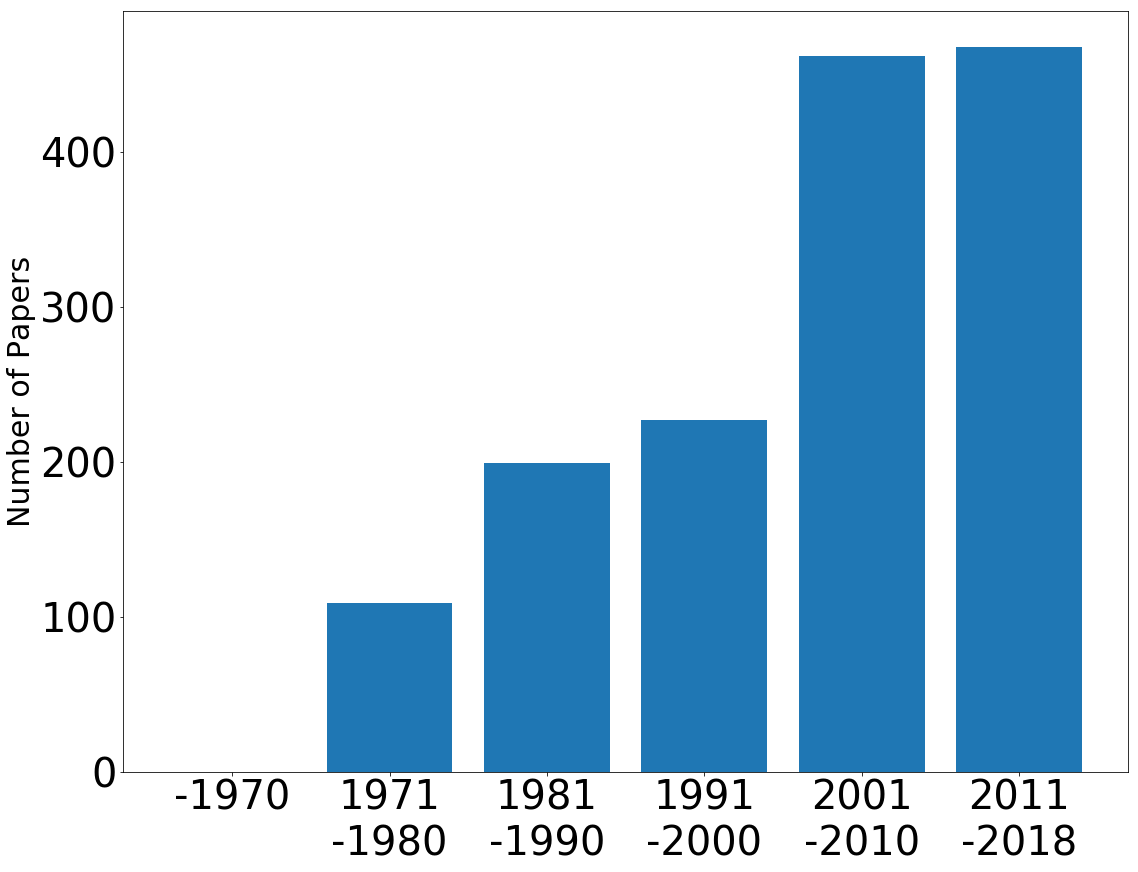

In [207]:
plotting_np(mercury_tplot)

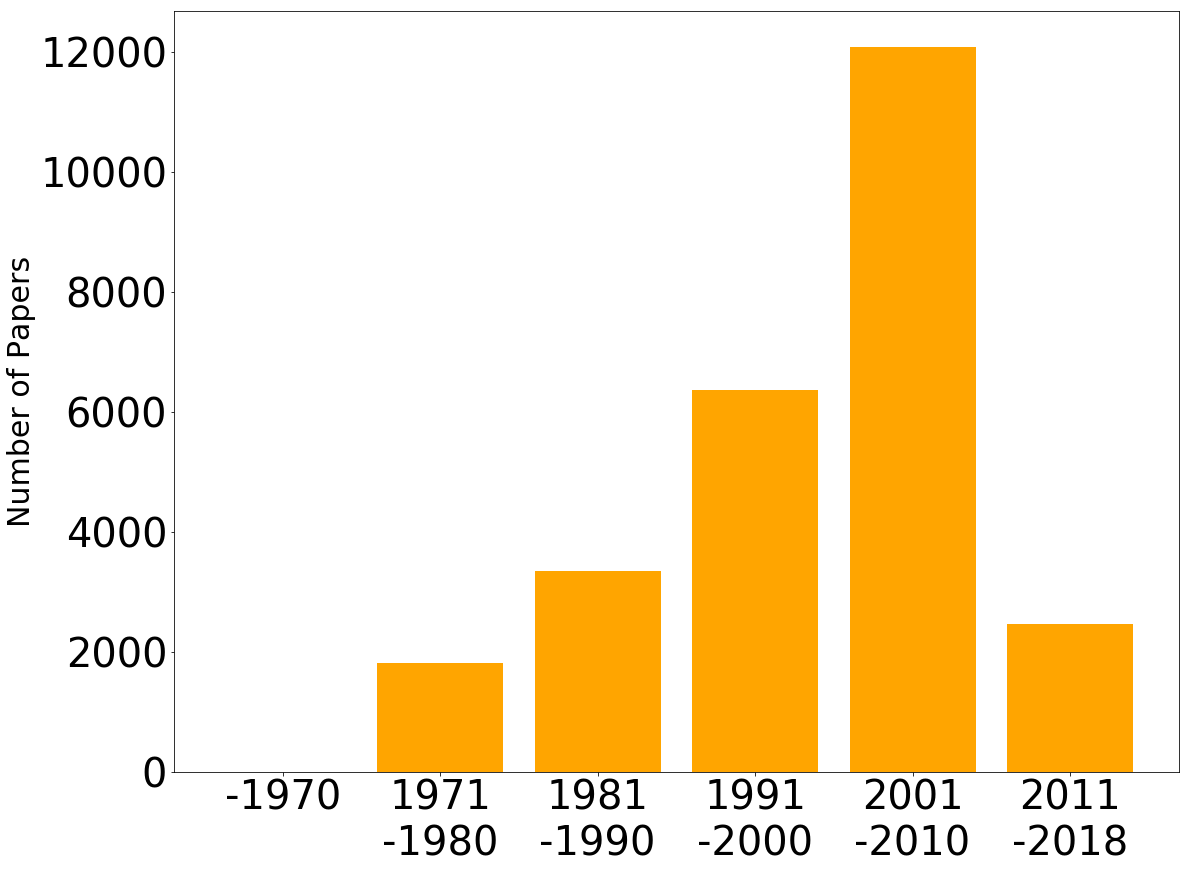

In [208]:
plotting_cc(mercury_tplot)

In [209]:
moong1 = moon_paper.groupby(['title','year']).mean()
moong2 = moong1.groupby(['year','title']).count()
moong3 = moong1.groupby(['year','title']).mean()
moon_np = moong2.groupby('year').sum()
moon_cc = moong3.groupby('year').sum()
moon_np.index = moon_np.index.astype(int)
moon_np.columns = ['NP']
moon_np['CC'] = list(moon_cc['citation_count'].astype(int))

moong1 = moon_paper.groupby(['title','year']).mean()
moong2 = moong1.groupby(['year','title']).count()
moong3 = moong1.groupby(['year','title']).mean()
moon_np = moong2.groupby('year').sum()
moon_cc = moong3.groupby('year').sum()
moon_np.index = moon_np.index.astype(int)
moon_np.columns = ['NP']
moon_np['CC'] = list(moon_cc['citation_count'].astype(int))
moon_tplot = moon_np.groupby(pd.cut(moon_np.index, bins)).sum()
moon_tplot.index = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']
moon_tplot

,NP,CC
-1970,204,854
1971-1980,5986,94731
1981-1990,7324,147020
1991-2000,5463,73262
2001-2010,1430,13832
2011-2018,1496,6586


In [210]:
moon_tplot.T

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,204,5986,7324,5463,1430,1496
CC,854,94731,147020,73262,13832,6586


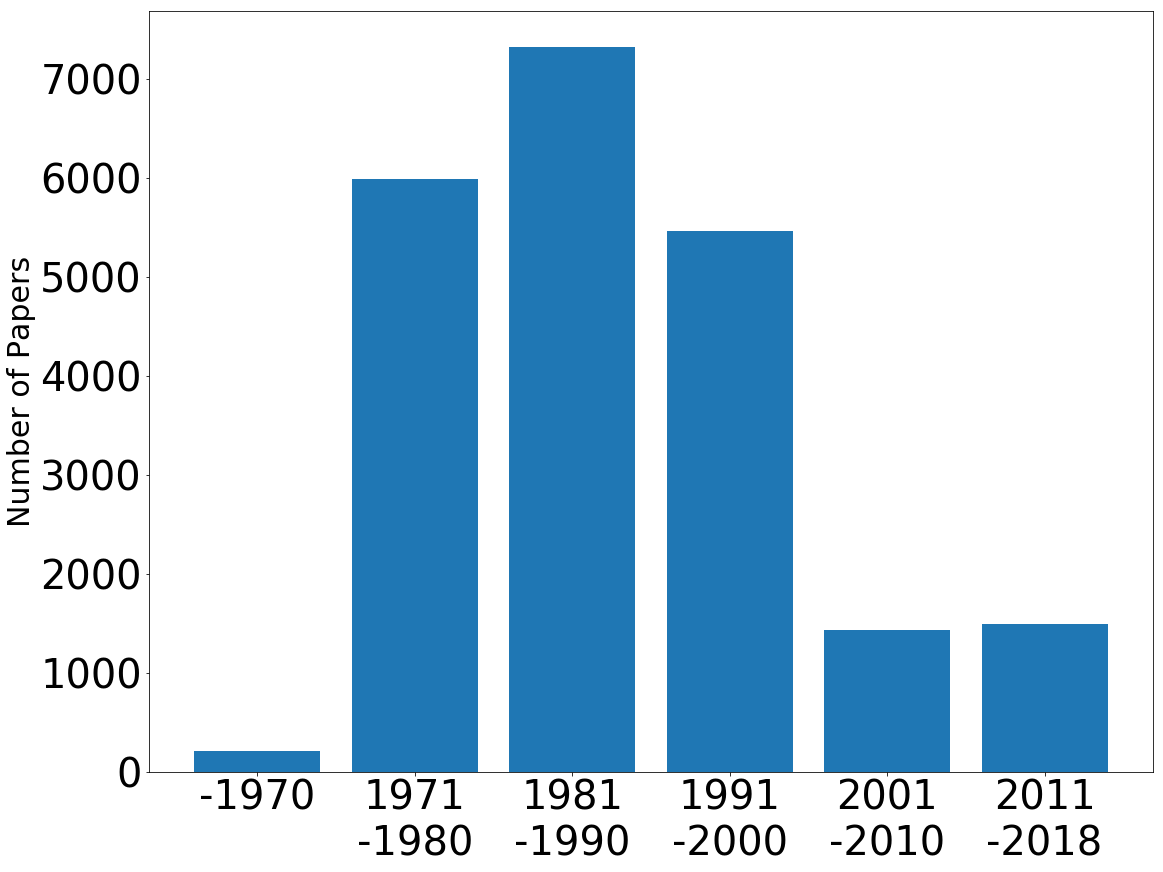

In [211]:
plotting_np(moon_tplot)

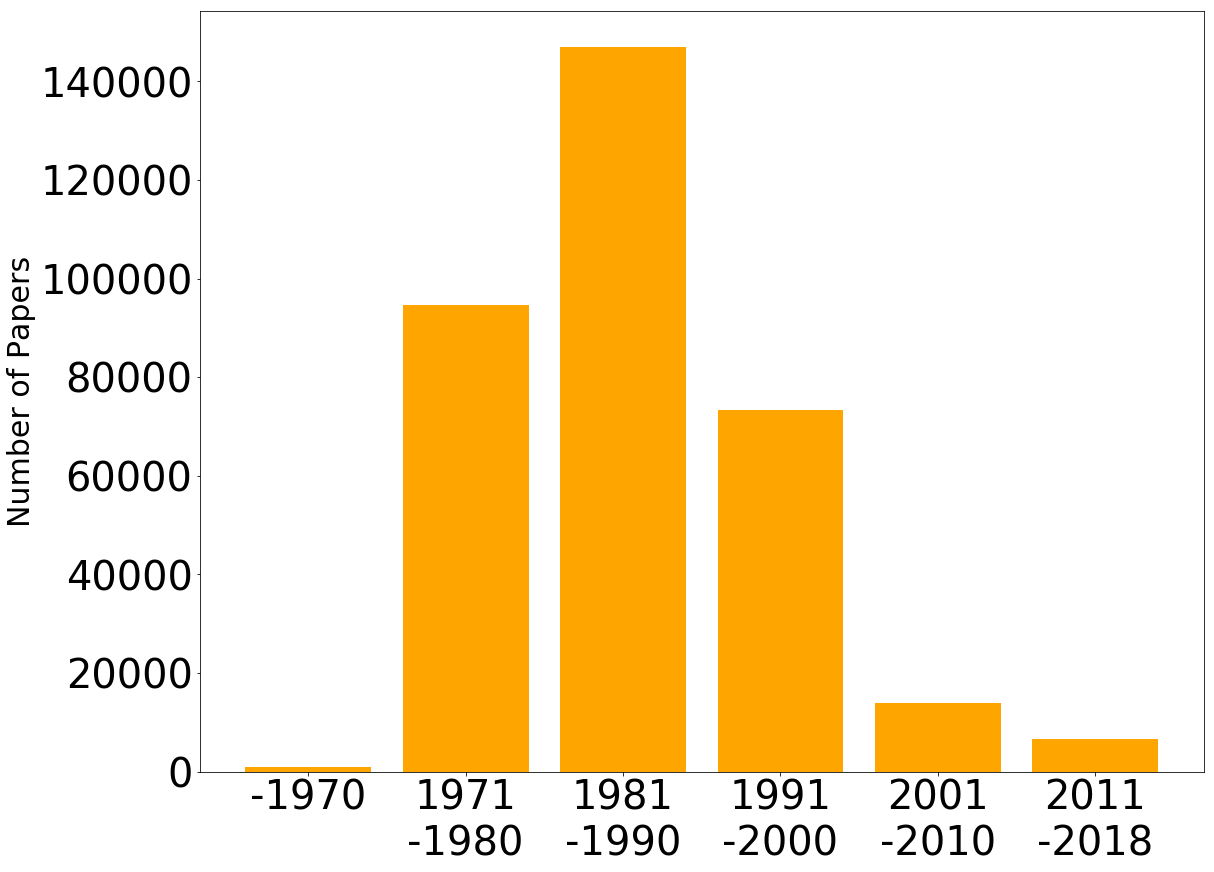

In [212]:
plotting_cc(moon_tplot)

In [213]:
venusg1 = venus_paper.groupby(['title','year']).mean()
venusg2 = venusg1.groupby(['year','title']).count()
venusg3 = venusg1.groupby(['year','title']).mean()
venus_np = venusg2.groupby('year').sum()
venus_cc = venusg3.groupby('year').sum()
venus_np.index = venus_np.index.astype(int)
venus_np.columns = ['NP']
venus_np['CC'] = list(venus_cc['citation_count'].astype(int))

venusg1 = venus_paper.groupby(['title','year']).mean()
venusg2 = venusg1.groupby(['year','title']).count()
venusg3 = venusg1.groupby(['year','title']).mean()
venus_np = venusg2.groupby('year').sum()
venus_cc = venusg3.groupby('year').sum()
venus_np.index = venus_np.index.astype(int)
venus_np.columns = ['NP']
venus_np['CC'] = list(venus_cc['citation_count'].astype(int))
venus_tplot = venus_np.groupby(pd.cut(venus_np.index, bins)).sum()
venus_tplot.index = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']
venus_tplot

,NP,CC
-1970,6,33
1971-1980,106,1762
1981-1990,396,4840
1991-2000,541,8114
2001-2010,164,1002
2011-2018,133,637


In [214]:
venus_tplot.T

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
NP,6,106,396,541,164,133
CC,33,1762,4840,8114,1002,637


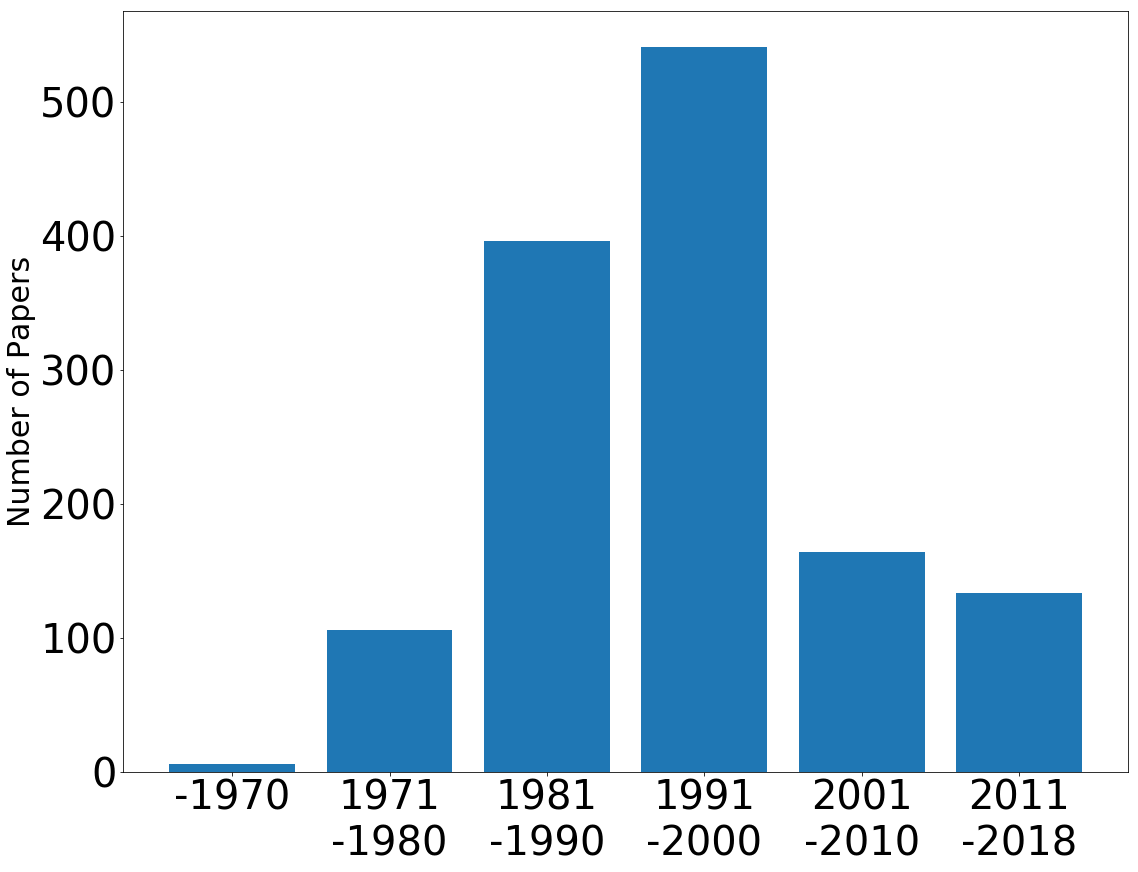

In [215]:
plotting_np(venus_tplot)

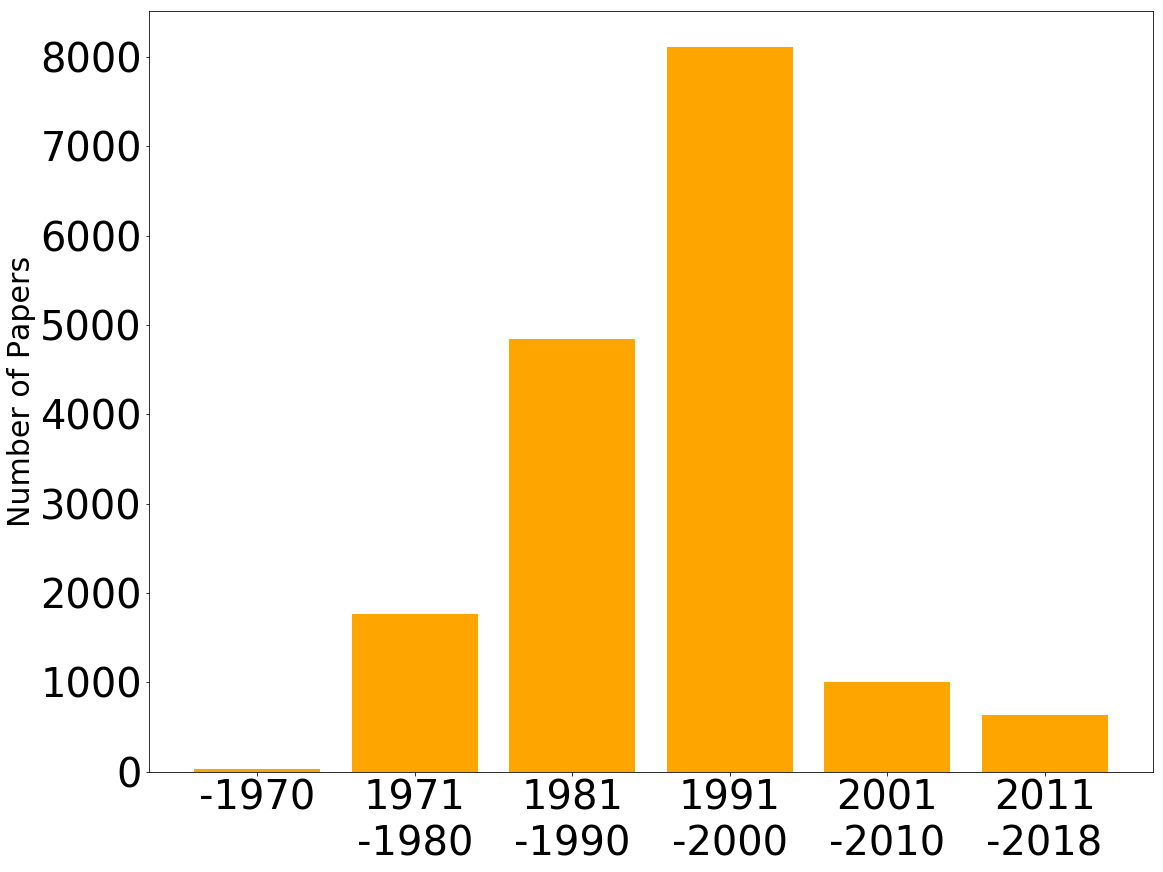

In [216]:
plotting_cc(venus_tplot)

In [217]:
mars_np['range'] = pd.cut(mars_np['NP'], bins)

In [218]:
mars_list = list(mars_tplot.NP)
mercury_list = list(mercury_tplot.NP)
moon_list = list(moon_tplot.NP)
venus_list = list(venus_tplot.NP)
comparison_np = pd.DataFrame([mars_list, mercury_list, moon_list, venus_list])
comparison_np.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']
comparison_np.index = ['Mars', 'Mercury', 'The Moon', 'Venus']

In [219]:
comparison_np

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
Mars,124,1248,1989,2448,2906,2386
Mercury,0,109,199,227,462,468
The Moon,204,5986,7324,5463,1430,1496
Venus,6,106,396,541,164,133


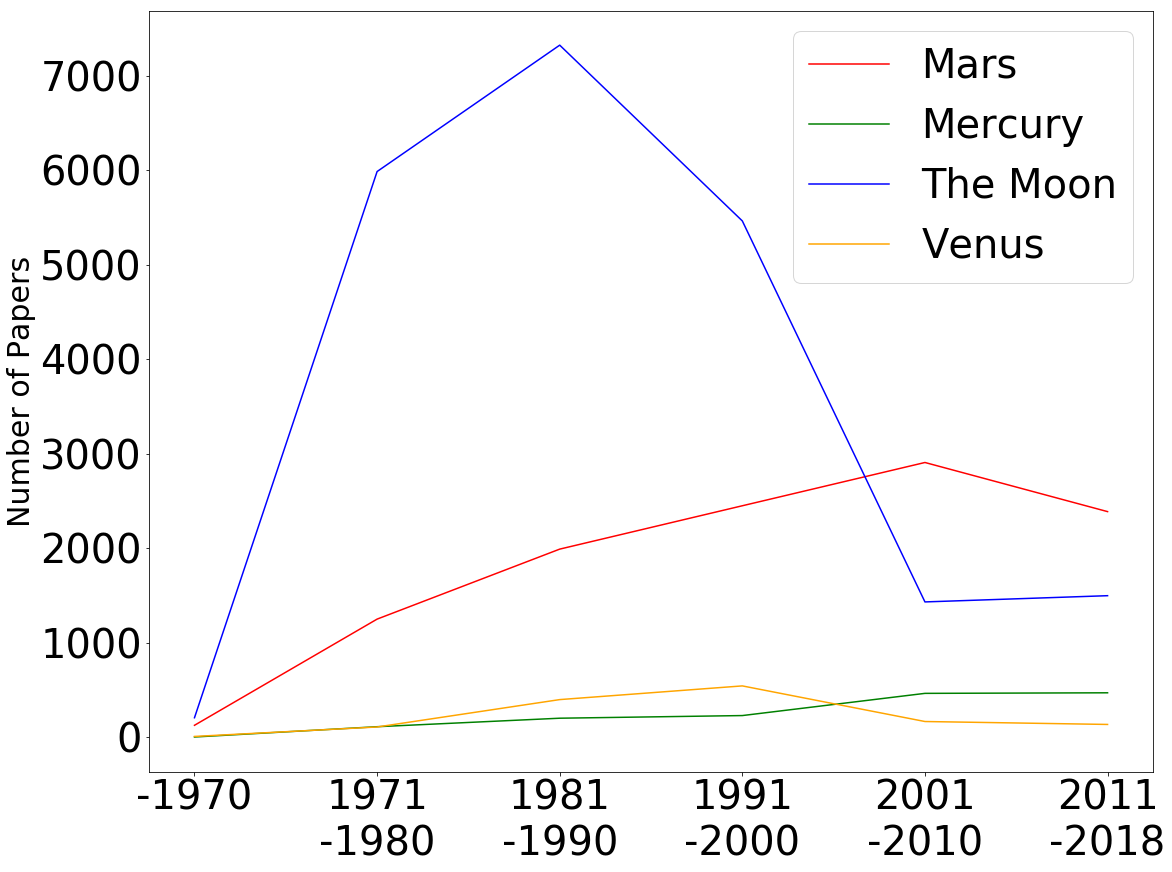

In [220]:
year = comparison_np.columns
mars_np = comparison_np.loc['Mars']
mercury_np = comparison_np.loc['Mercury']
venus_np = comparison_np.loc['Venus']
moon_np = comparison_np.loc['The Moon']
plt.rcParams.update(params)
plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Number of Papers', fontsize=30)
plt.plot(year, mars_np, color='red', label='Mars')
plt.plot(year, mercury_np, color='g', label='Mercury')
plt.plot(year, moon_np, color='blue', label='The Moon')
plt.plot(year, venus_np, color='orange', label ='Venus')
leg = plt.legend();
plt.show()

In [221]:
mars_list = list(mars_tplot.NP)
mercury_list = list(mercury_tplot.NP)
moon_list = list(moon_tplot.NP)
venus_list = list(venus_tplot.NP)
comparison_np = pd.DataFrame([mars_list, mercury_list, moon_list, venus_list])
comparison_np.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']
comparison_np.index = ['Mars', 'Mercury', 'The Moon', 'Venus']

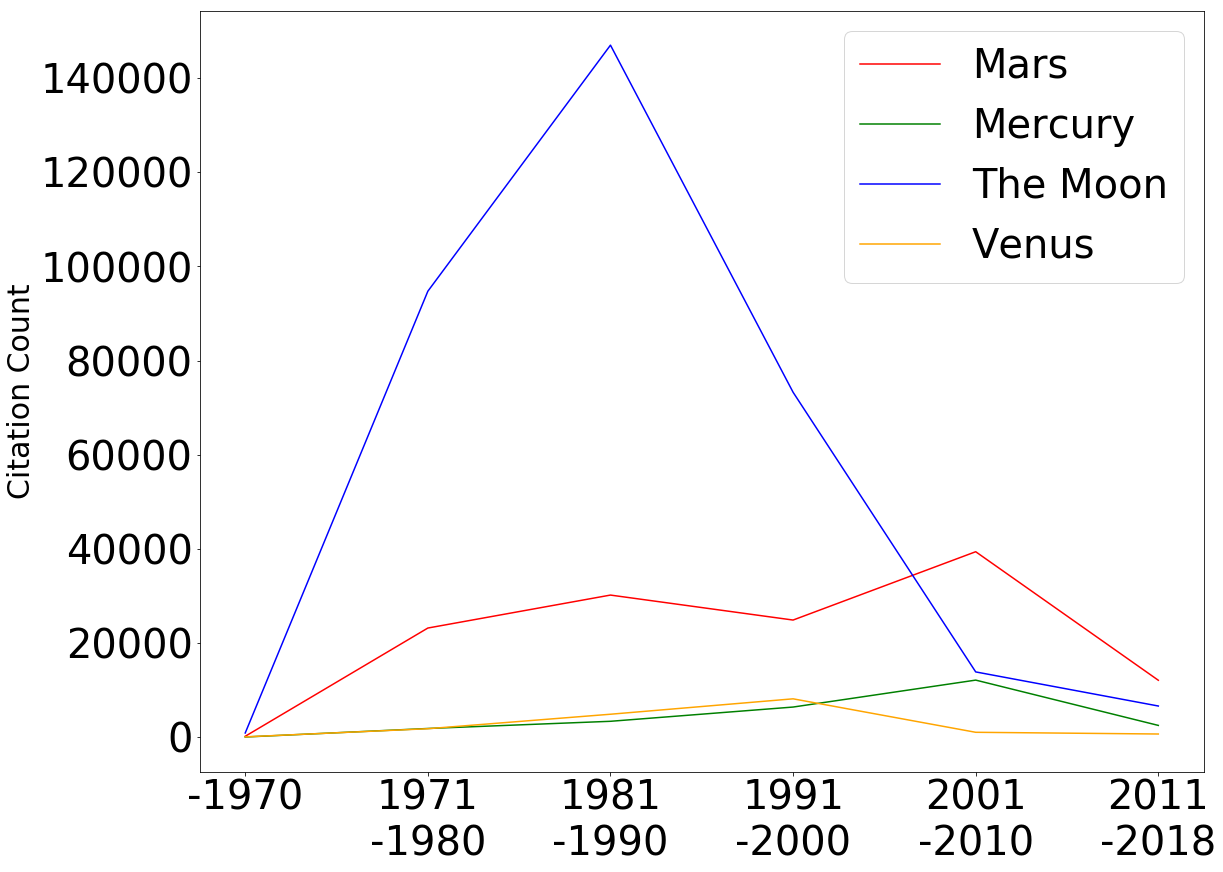

In [222]:
mars_list = list(mars_tplot.CC)
mercury_list = list(mercury_tplot.CC)
moon_list = list(moon_tplot.CC)
venus_list = list(venus_tplot.CC)
comparison_CC = pd.DataFrame([mars_list, mercury_list, moon_list, venus_list])
comparison_CC.columns = ['-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2018']
comparison_CC.index = ['Mars', 'Mercury', 'The Moon', 'Venus']
year = comparison_CC.columns
mars_CC = comparison_CC.loc['Mars']
mercury_CC = comparison_CC.loc['Mercury']
venus_CC = comparison_CC.loc['Venus']
moon_CC = comparison_CC.loc['The Moon']
plt.rcParams.update(params)
plt.xticks(np.arange(6), ('-1970', '1971\n-1980', '1981\n-1990', '1991\n-2000', '2001\n-2010', '2011\n-2018'), fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Citation Count', fontsize=30)
plt.plot(year, mars_CC, color='red', label='Mars')
plt.plot(year, mercury_CC, color='g', label='Mercury')
plt.plot(year, moon_CC, color='blue', label='The Moon')
plt.plot(year, venus_CC, color='orange', label ='Venus')
leg = plt.legend();
plt.show()

In [223]:
comparison_np

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
Mars,124,1248,1989,2448,2906,2386
Mercury,0,109,199,227,462,468
The Moon,204,5986,7324,5463,1430,1496
Venus,6,106,396,541,164,133


In [224]:
comparison_CC

,-1970,1971-1980,1981-1990,1991-2000,2001-2010,2011-2018
Mars,156,23156,30161,24854,39373,12058
Mercury,0,1811,3339,6366,12091,2465
The Moon,854,94731,147020,73262,13832,6586
Venus,33,1762,4840,8114,1002,637


In [225]:
# CRism Team and MRO Marci CTX team
import csv
crism2 = ['Scott Murchie', 'John Mustard', 'Andy Santo', 'Frank Seelos', 'John Aiello', 'Olivier Barnouin', 'Debra Buczkowski',
'Teck Choo',  'Ray Espiritu', 'Pierluigi Guasqui', 'Christopher Hash',
'David Humm', 'Eliezer Kahn', 'Calogero Mauceri', 'Andy McGovern',
'Frank Morgan', 'Hari Nair', 'Giuseppe Romeo', 'Kim Seelos', 'Howard Taylor',
'Anthony Toigo', 'Christina Viviano']
mro_marci_ctx2 = ['Michael C. Malin', 'James F. Bell III', 'Wendy M. Calvin',
'Bruce A. Cantor', 'R. Todd Clancy', 'Kenneth S. Edgett',
'Laurence J. Edwards', 'Robert M. Haberle', 'Philip B. James', 
'Steven W. Lee', 'Peter C. Thomas', 'Rebecca M. E. Williams', 'Michael J. Wolff']

In [226]:
mro_marc_ctx_dict = {'Michael C. Malin':'Malin, Michael C.','James F. Bell III': 'Bell, James F.', 'Wendy M. Calvin': 'Calvin, Wendy M.', 'Bruce A. Cantor':'Cantor, Bruce A.',
                    'R. Todd Clancy':'Clancy, R. Todd', 'Kenneth S. Edgett':'Edgett, Kenneth S.', 'Laurence J. Edwards':'Edwards, Lawrence',
                    'Robert M. Haberle':'Haberle, Robert M.', 'Philip B. James': 'James, Philip B.','Steven W. Lee':'Lee, Steven W.',
                    'Peter C. Thomas': 'Thomas, Peter C.', 'Michael J. Wolff':'Wolff, Michael J.', 'Rebecca M. E. Williams': 'Williams, Rebecca M. E.'}

In [227]:
crism_dict = {'Scott Murchie': 'Murchie, S. L.', 'John Mustard': 'Mustard, J. F.', 'Frank Seelos':'Seelos, Frank P.', 'Kim Seelos':'Seelos, Kim D.',
             'Olivier Barnouin':'Barnouin, O. S.',  'Debra Buczkowski':'Buczkowski, Debra L.', 'Teck Choo': 'Choo, T. H.', 'Ray Espiritu':'Espiritu, R', 
             }

In [228]:
mro_marci_ctx= ['Malin, Michael C.', 'Bell, James F.', 'Cantor, Bruce A.', 'Caplinger, Michael A.', 
                'Calvin, Wendy M.', 'Clancy, R. Todd', 'Edgett, Kenneth S.', 'Edwards, Lawrence', 
                'Haberle, Robert M.', 'James, Philip B.', 'Lee, Steven W.', 'Ravine, Michael A.', 'Thomas, Peter C.', 'Wolff, Michael J.']

In [229]:
crism = ['Murchie, S. L.', 'Mustard, J. F.', 'Seelos, Frank P.', 'Seelos, Kim D.', 'Barnouin, O. S.', 'Buczkowski, Debra L.', 'Choo, T.', 'Choo, T. H.', 'Espiritu, R', 
        'Hash, C.', 'Humm, D.', 'McGovern, J. A.', 'Nair, H.', 'Taylor, H.', 'Toigo, Anthony D.' ]

In [230]:
mars_group = mars_paper.groupby([mars_paper.index, 'title','name','year','author']).sum().sort_values(by=['citation_count'], ascending = False)

In [231]:
mars_group.groupby('title').count()

,citation_count
title,
"[""'Face and pyramids' in the Martian Cydonia Region. I - Speculations on an 'artificial' origin""]",1
"[""'Faces' and 'pyramids' in the Cydonia region of Mars. II - Speculations on an artificial origin""]",1
"[""2012 Moon Mars Analog Mission Activities on Mauna Kea, Hawai'i""]",2
"[""3D Multi-species Global MHD Studies Of The Solar Wind Interaction With Mars And Saturn's Magnetospheric Plasma Flow With Titan""]",2
"[""A Brief Summary of the Geomorphic Evidence for an Active Surface Hydrologic Cycle in Mars' Past""]",4
"[""A Concept for NASA's Mars 2016 Astrobiology Field Laboratory""]",1
"[""A Martian observer's menu for 1986.""]",1
"[""A Stone's Throw from the Planets""]",1
"[""A comparison between the Earth's and Mars' bow shocks detected by the Phobos Plasma-Wave System""]",2


In [232]:
mars_paper.loc[13, 'author']

"['Uckert, Kyle', 'Chanover, Nancy J.', 'Getty, Stephanie', 'Voelz, David G.', 'Brinckerhoff, William B.', 'McMillan, Nancy', 'Xiao, Xifeng', 'Boston, Penelope J.', 'Li, Xiang', 'McAdam, Amy', 'Glenar, David A.', 'Chavez, Arriana']"

In [239]:
import re
crism_result = pd.DataFrame()
for i in range(len(mars_paper)):
    for j in crism:
        search = mars_paper.loc[i, 'author']
        result = re.search(j, search)
        try:
            if result[0] == j:
                team = mars_paper.loc[i, ['title','name','author','year','citation_count']]
                crism_result = crism_result.append(team)
        except:
            pass

In [251]:
crismteam = crism_result.groupby(['title','author','name', 'year']).mean().sort_values(by=['citation_count'], ascending = False)
crismteam.groupby('title').mean().sort_values(by=['citation_count'], ascending=False).to_csv("crism_h.csv")
crismteam_final = crismteam.groupby(['title','year']).mean().sort_values(by=['citation_count'], ascending = False)
crismteam_final.to_csv("crismteam.csv")
crismteam_np = crismteam_final.groupby('year').count()
crismteam_cc = crismteam_final.groupby('year').mean()
crismteam_np.columns = ['NP']

In [258]:
crismteam_np.index = crismteam_np.index.astype(np.int32)

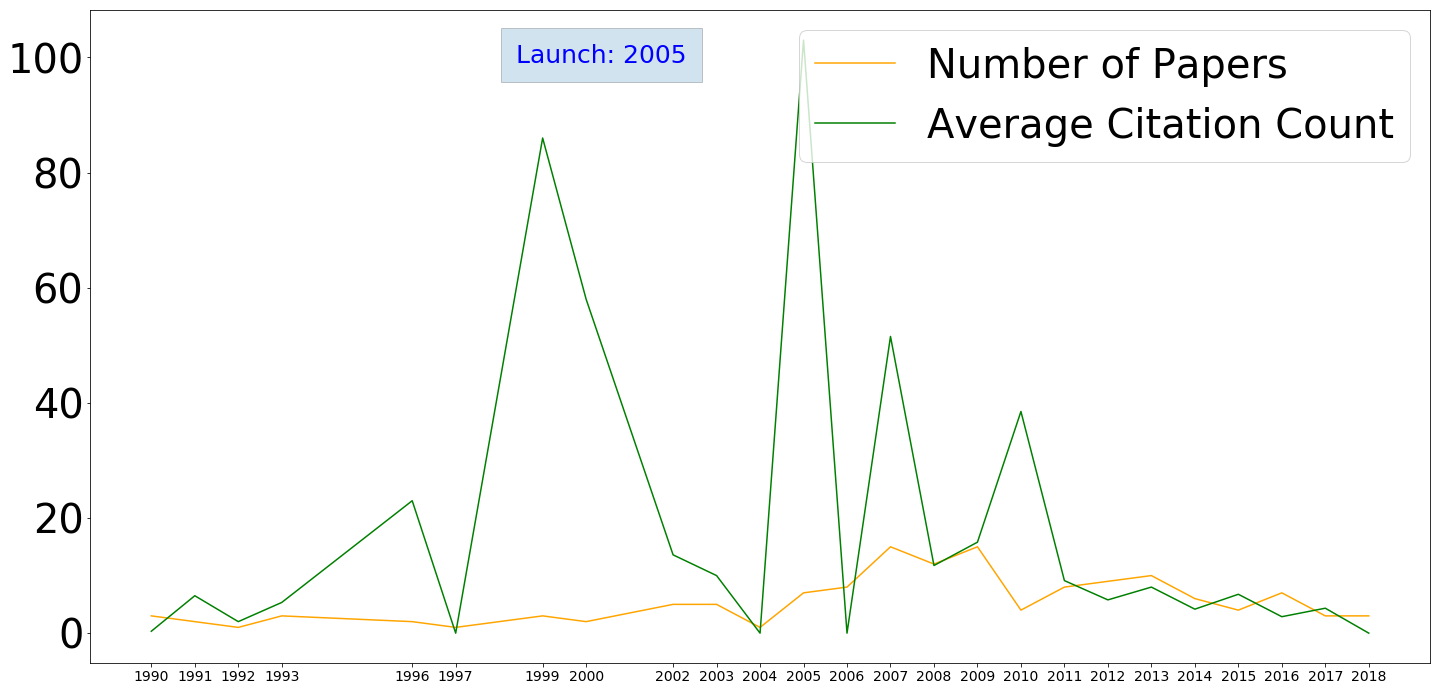

In [263]:
#Crism Team Number of Papers and Average Citation Count
plt.rcParams["figure.figsize"] = (24,12)
params = {'legend.fontsize': 40,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.xticks(crismteam_np.index, fontsize=14)
plt.yticks(fontsize=40)
plt.figtext(0.47, 0.82, 'Launch: 2005', ha="right", fontsize=25, color ='b', bbox={"alpha":0.2,"pad":15})
plt.plot(crismteam_np.index, crismteam_np['NP'], color='orange', label='Number of Papers')
plt.plot(crismteam_np.index, crismteam_cc['citation_count'], color='g', label='Average Citation Count')
leg = plt.legend();
plt.show()

<BarContainer object of 38 artists>

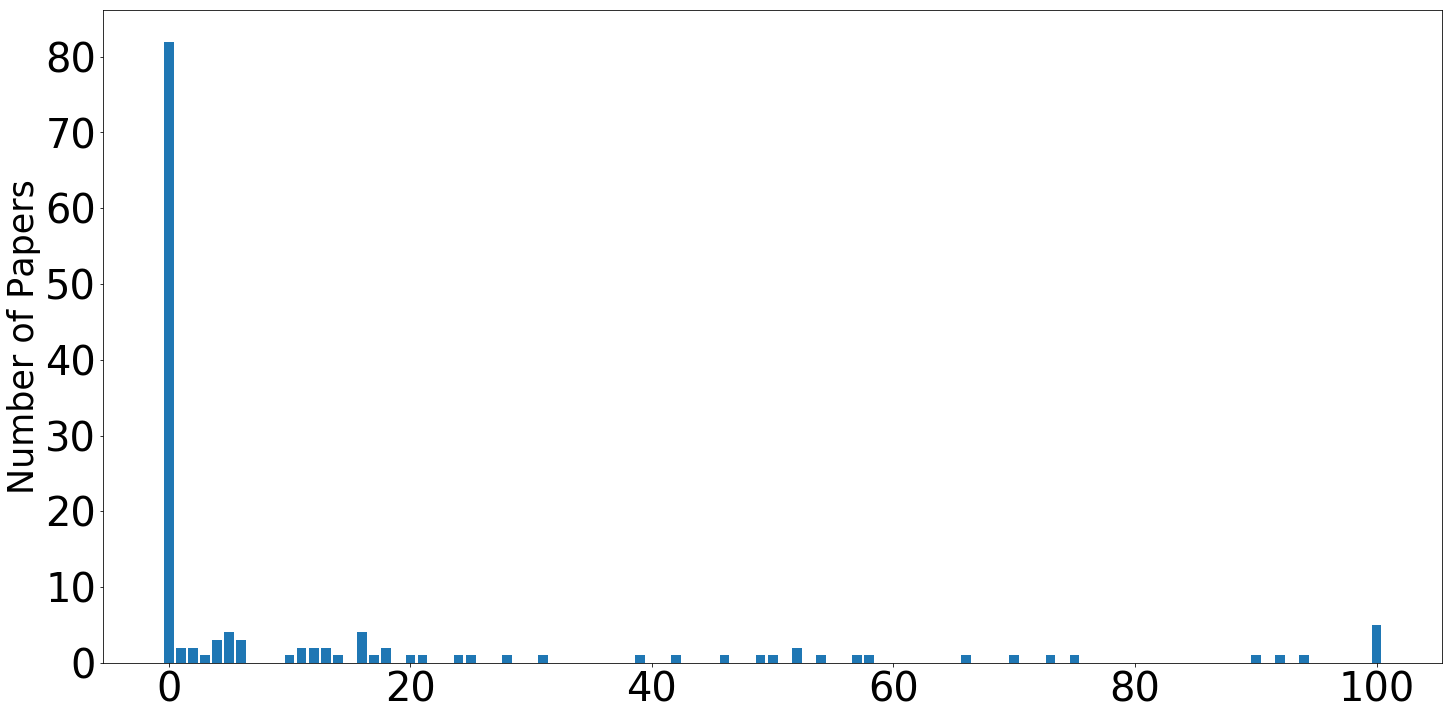

In [264]:
#Crism Team Citation Distrbiution 
cdpre_crism = crism_result.groupby(['title','citation_count']).count()
cd_crism = cdpre_crism.groupby('citation_count').count()
cd_crism.loc[100] = cd_crism[cd_crism.index > 100 ].sum()
cd_crism = cd_crism.drop(cd_crism[cd_crism.index > 100].index)
cd_crism = cd_crism.drop(['author', 'name'], axis=1)
cd_crism.columns = ['NP']
plt.rcParams["figure.figsize"] = (24,12)
params = {'legend.fontsize': 40,
          'legend.handlelength': 2}
plt.ylabel('Citation Count', fontsize=35)
plt.ylabel('Number of Papers', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.rcParams.update(params)
plt.bar(cd_crism.index.astype(int), cd_crism['NP'])

In [265]:
mro_marci_ctx= ['Malin, Michael C.', 'Bell, James F.', 'Cantor, Bruce A.', 'Caplinger, Michael A.', 'Calvin, Wendy M.', 
                'Clancy, R. Todd', 'Edgett, Kenneth S.', 'Edwards, Lawrence', 'Haberle, Robert M.', 'James, Philip B.', 
                'Lee, Steven W.', 'Ravine, Michael A.', 'Thomas, Peter C.', 'Wolff, Michael J.']

In [266]:
mro_marci_ctx_result = pd.DataFrame()
for i in range(len(mars_paper)):
    for j in mro_marci_ctx:
        search = mars_paper.loc[i, 'author']
        result = re.search(j, search)
        try:
            if result[0] == j:
                team = mars_paper.loc[i, ['title','name','author','year','citation_count']]
                mro_marci_ctx_result = mro_marci_ctx_result.append(team)
        except:
            pass

In [267]:
mro_marci_ctxteam = mro_marci_ctx_result.groupby(['title','author','name', 'year']).mean().sort_values(by=['citation_count'], ascending = False)

In [268]:
mro_marci_ctxteam_final = mro_marci_ctxteam.groupby(['title','year']).mean().sort_values(by=['citation_count'], ascending = False)

In [269]:
mro_marci_ctxteam_np = mro_marci_ctxteam_final.groupby('year').count()
mro_marci_ctxteam_cc = mro_marci_ctxteam_final.groupby('year').mean()

In [270]:
mro_marci_ctxteam_np.columns = ['NP']

In [271]:
mro_marci_ctxteam.groupby('title').mean().sort_values(by=['citation_count'], ascending=False).to_csv("mro_h.csv")

In [272]:
mro_marci_ctxteam_cc.index = mro_marci_ctxteam_cc.index.astype(int)
mro_marci_ctxteam_np.index = mro_marci_ctxteam_np.index.astype(int)

In [273]:
mro_bin = [1977, 2006, 2018]

In [274]:
mro_marci_ctxteam_cc.groupby(pd.cut(mro_marci_ctxteam_cc.index, mro_bin)).mean()

,citation_count
"(1977, 2006]",36.619671
"(2006, 2018]",26.959028


In [277]:
mro_marci_ctxteam_np.groupby(pd.cut(mro_marci_ctxteam_np.index, mro_bin)).mean()

,NP
"(1977, 2006]",4.518519
"(2006, 2018]",4.500000


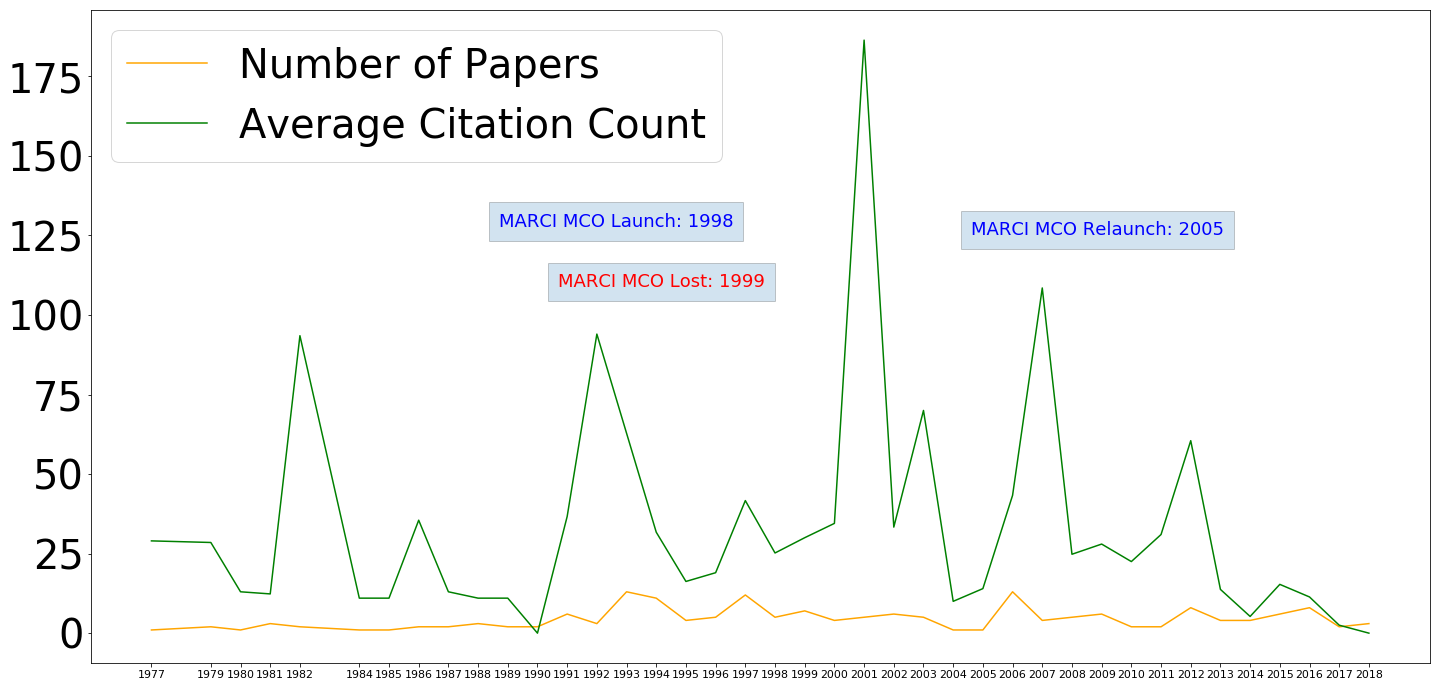

In [281]:
#MRO MARCI CTX Team Number of Papers and Average Citation Count
plt.rcParams["figure.figsize"] = (24,12)
params = {'legend.fontsize': 40,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.xticks(mro_marci_ctxteam_np.index, fontsize=11)
plt.yticks(fontsize=40)
plt.figtext(0.497, 0.63, 'MARCI MCO Launch: 1998', ha="right", fontsize=18, color ='b', bbox={"alpha":0.2,"pad":10})
plt.figtext(0.515, 0.56, 'MARCI MCO Lost: 1999', ha="right", fontsize=18, color ='r', bbox={"alpha":0.2,"pad":10})
plt.figtext(0.781, 0.62, 'MARCI MCO Relaunch: 2005', ha="right", fontsize=18, color ='b', bbox={"alpha":0.2,"pad":10})

plt.plot(mro_marci_ctxteam_np.index, mro_marci_ctxteam_np['NP'], color='orange', label='Number of Papers')
plt.plot(mro_marci_ctxteam_np.index, mro_marci_ctxteam_cc['citation_count'], color='g', label='Average Citation Count')
leg = plt.legend();
plt.show()

<BarContainer object of 62 artists>

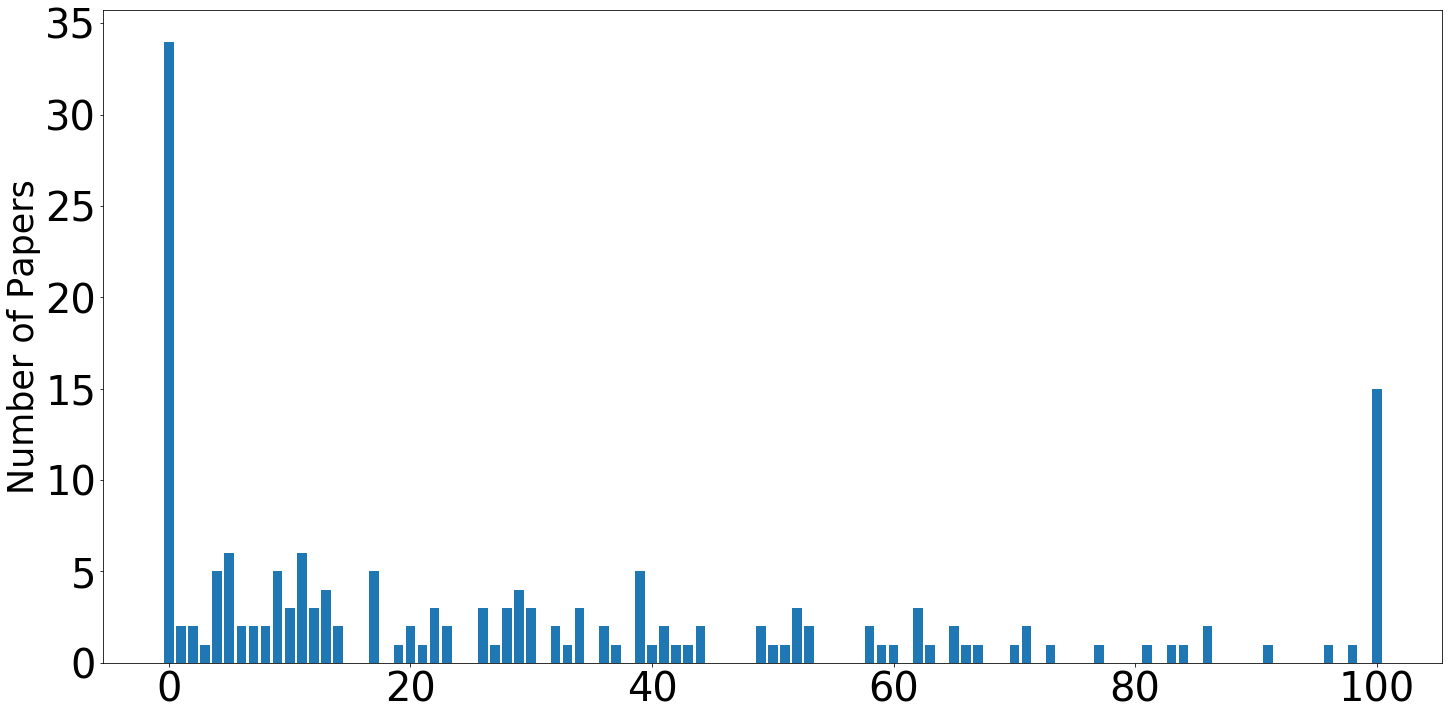

In [282]:
#MRO MARCI CTX Team Citation Distribution
cdpre_mro_marci_ctx = mro_marci_ctx_result.groupby(['title','citation_count']).count()
cd_mro_marci_ctx = cdpre_mro_marci_ctx.groupby('citation_count').count()
cd_mro_marci_ctx.loc[100] = cd_mro_marci_ctx[cd_mro_marci_ctx.index > 100 ].sum()
cd_mro_marci_ctx = cd_mro_marci_ctx.drop(cd_mro_marci_ctx[cd_mro_marci_ctx.index > 100].index)
cd_mro_marci_ctx = cd_mro_marci_ctx.drop(['author', 'name'], axis=1)
cd_mro_marci_ctx.columns = ['NP']
plt.rcParams["figure.figsize"] = (24,12)
params = {'legend.fontsize': 40,
          'legend.handlelength': 2}
plt.ylabel('Citation Count', fontsize=35)
plt.ylabel('Number of Papers', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.rcParams.update(params)
plt.bar(cd_mro_marci_ctx.index.astype(int), cd_mro_marci_ctx['NP'])